## Crypto data mining using Coin Market Cap API

In [187]:
#https://coinmarketcap.com/

In [189]:
import pandas as pd
from time import time
from time import sleep

In [193]:
def API_runner():
    global df
    ##https://coinmarketcap.com/api/documentation/v1/#section/Quick-Start-Guide:~:text=%23This%20example%20uses,(e)
    
    from requests import Request, Session
    from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
    import json
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '9e51506f-8e98-45cb-85ff-378954414997',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now')
    df
    #df = df.append(df2)

    #Creating csv 
    #If csv doesn't exit create csv
    if not os.path.isfile(r'C:\Users\User.SHAWONALAM\OneDrive\Documents\API Crypto\Crypto data.csv'):
        df.to_csv(r'C:\Users\User.SHAWONALAM\OneDrive\Documents\API Crypto\Crypto data.csv', header = 'Column_names')
    else:
        #If csv already exists then append('a') with previous data
        df.to_csv(r'C:\Users\User.SHAWONALAM\OneDrive\Documents\API Crypto\Crypto data.csv', mode='a', header = False)

#API_runner()
#print("done")

In [98]:
# Run API_runner() function to extract data

for i in range(20): #API call 20 times
    API_runner() 
    print("API scan completed.")
    sleep(10) #timer to recall API
exit()

API scan completed.
API scan completed.


KeyboardInterrupt: 

### Read CSV

In [138]:

new_df = pd.read_csv(r'C:\Users\User.SHAWONALAM\OneDrive\Documents\API Crypto\Crypto data.csv')
pd.set_option('display.max_columns', None) 
new_df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11642,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.974294e+07,1.974294e+07,False,NaN,1,NaN,NaN,NaN,2024-08-21T10:30:00.000Z,59324.214293,2.739149e+10,-2.5740,0.214045,-2.436379,-3.088020,-12.135451,-7.695847,-14.906383,1.171234e+12,55.7905,1.245809e+12,NaN,2024-08-21T10:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 12:31:56.543222
1,1,1027,Ethereum,ETH,ethereum,9236,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202914e+08,1.202914e+08,True,NaN,2,NaN,NaN,NaN,2024-08-21T10:30:00.000Z,2583.553028,1.212014e+10,-0.8535,0.302733,-2.988209,-5.775650,-26.139189,-26.003342,-32.533098,3.107791e+11,14.8040,3.107791e+11,NaN,2024-08-21T10:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 12:31:56.543222
2,2,825,Tether USDt,USDT,tether,94969,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.172945e+11,1.202584e+11,True,NaN,3,NaN,NaN,NaN,2024-08-21T10:30:00.000Z,1.000107,4.843434e+10,-0.5006,-0.012307,-0.036660,-0.022657,0.007223,0.070759,0.046226,1.173070e+11,5.5884,1.202712e+11,NaN,2024-08-21T10:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-21 12:31:56.543222
3,3,1839,BNB,BNB,bnb,2214,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.459359e+08,1.459359e+08,False,NaN,4,NaN,NaN,NaN,2024-08-21T10:30:00.000Z,555.324431,2.041278e+09,11.2219,0.175356,-2.418188,4.821820,-7.085898,-5.325526,-9.233955,8.104177e+10,3.8607,8.104177e+10,NaN,2024-08-21T10:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 12:31:56.543222
4,4,5426,Solana,SOL,solana,721,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.664308e+08,5.827286e+08,True,NaN,5,NaN,NaN,NaN,2024-08-21T10:30:00.000Z,141.600748,1.677711e+09,-24.7875,0.225718,-3.395850,-4.039671,-21.566079,5.628826,-19.331696,6.604696e+10,3.1464,8.251480e+10,NaN,2024-08-21T10:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 12:31:56.543222
5,5,3408,USDC,USDC,usd-coin,21589,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,3.481259e+10,3.481259e+10,False,NaN,6,NaN,NaN,NaN,2024-08-21T10:30:00.000Z,0.999945,4.897473e+09,-2.5198,-0.006041,-0.012406,-0.003009,-0.002494,-0.003100,-0.007876,3.481068e+10,1.6583,3.481068e+10,NaN,2024-08-21T10:30:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-21 12:31:56.543222
6,6,52,XRP,XRP,xrp,1369,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.611308e+10,9.998734e+10,False,NaN,7,NaN,NaN,NaN,2024-08-21T10:30:00.000Z,0.599077,1.131064e+09,-28.0454,0.653974,-1.458422,3.033916,-0.885337,23.466306,14.155618,3.361606e+10,1.6014,5.990770e+10,NaN,2024-08-21T10:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 12:31:56.543222
7,7,11419,Toncoin,TON,toncoin,518,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.525488e+09,5.110813e+09,True,NaN,8,3.414167e+09,2.278859e+10,NaN,2024-08-21T10:30:00.000Z,6.674716,2.278638e+08,-24.0311,0.230004,-2.369430,-7.493091,-5.400354,-7.122138,3.430611,1.685691e+10,0.8030,3.411323e+10,NaN,2024-08-21T10:30:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-21 12:31:56.543222
8,8,74,Dogecoin,DOGE,dogecoin,1041,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scry

### Group by percent_change_ to pivot table

In [101]:
df3 = new_df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 
                                          'quote.USD.percent_change_24h',
                                         'quote.USD.percent_change_7d',
                                         'quote.USD.percent_change_30d',
                                         'quote.USD.percent_change_60d',
                                         'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.135253,-2.431505,-3.198304,-12.091304,-7.723536,-14.929215
Ethereum,0.274150,-2.921432,-6.073196,-26.076839,-25.989305,-32.542452
Tether USDt,-0.007519,-0.039797,-0.021751,0.003742,0.074414,0.041686
BNB,0.048838,-2.389316,4.647445,-7.077252,-5.382480,-9.165630
Solana,0.238548,-3.322189,-4.135138,-21.245570,5.661554,-19.001731
USDC,-0.004128,-0.012394,-0.004092,-0.003447,-0.000920,-0.012642
XRP,0.485548,-1.489933,3.000752,-0.837655,23.388721,14.127817
Toncoin,0.576908,-2.047441,-7.268176,-5.073877,-6.801517,3.954515
Dogecoin,0.356705,-1.248976,-2.213206,-24.625738,-16.250136,-37.238487


### Stacking dataframe 

In [151]:
df4 = df3.stack()
#pd.set_option('display.max_rows', None) 
print(type(df4))
print(df4)


<class 'pandas.core.series.Series'>
name                                      
Bitcoin       quote.USD.percent_change_1h      0.135253
              quote.USD.percent_change_24h    -2.431505
              quote.USD.percent_change_7d     -3.198304
              quote.USD.percent_change_30d   -12.091304
              quote.USD.percent_change_60d    -7.723536
              quote.USD.percent_change_90d   -14.929215
Ethereum      quote.USD.percent_change_1h      0.274150
              quote.USD.percent_change_24h    -2.921432
              quote.USD.percent_change_7d     -6.073196
              quote.USD.percent_change_30d   -26.076839
              quote.USD.percent_change_60d   -25.989305
              quote.USD.percent_change_90d   -32.542452
Tether USDt   quote.USD.percent_change_1h     -0.007519
              quote.USD.percent_change_24h    -0.039797
              quote.USD.percent_change_7d     -0.021751
              quote.USD.percent_change_30d     0.003742
              quote.USD.p

In [156]:
# When stacking dataframe, it is changed into Pandas.Series 
# So have to convert the pandas.Series -> pandas.DataFrame

### Converting pandas..Series -> pandas..DataFrame

In [153]:
df5 = df4.to_frame(name = 'values')
print(type(df5))
print(df5)

<class 'pandas.core.frame.DataFrame'>
                                              values
name                                                
Bitcoin      quote.USD.percent_change_1h    0.135253
             quote.USD.percent_change_24h  -2.431505
             quote.USD.percent_change_7d   -3.198304
             quote.USD.percent_change_30d -12.091304
             quote.USD.percent_change_60d  -7.723536
             quote.USD.percent_change_90d -14.929215
Ethereum     quote.USD.percent_change_1h    0.274150
             quote.USD.percent_change_24h  -2.921432
             quote.USD.percent_change_7d   -6.073196
             quote.USD.percent_change_30d -26.076839
             quote.USD.percent_change_60d -25.989305
             quote.USD.percent_change_90d -32.542452
Tether USDt  quote.USD.percent_change_1h   -0.007519
             quote.USD.percent_change_24h  -0.039797
             quote.USD.percent_change_7d   -0.021751
             quote.USD.percent_change_30d   0.003742
        

In [106]:
df4.count()

90

### Indexing Column

In [110]:
index = pd.Index(range(90))
df8 = df5.reset_index()
df8

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.135253
1,Bitcoin,quote.USD.percent_change_24h,-2.431505
2,Bitcoin,quote.USD.percent_change_7d,-3.198304
3,Bitcoin,quote.USD.percent_change_30d,-12.091304
4,Bitcoin,quote.USD.percent_change_60d,-7.723536
5,Bitcoin,quote.USD.percent_change_90d,-14.929215
6,Ethereum,quote.USD.percent_change_1h,0.274150
7,Ethereum,quote.USD.percent_change_24h,-2.921432
8,Ethereum,quote.USD.percent_change_7d,-6.073196
9,Ethereum,quote.USD.percent_change_30d,-26.076839


### Rename column name

In [112]:
df9 = df8.rename(columns={'level_1': 'percentage_change'})
df9

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.135253
1,Bitcoin,quote.USD.percent_change_24h,-2.431505
2,Bitcoin,quote.USD.percent_change_7d,-3.198304
3,Bitcoin,quote.USD.percent_change_30d,-12.091304
4,Bitcoin,quote.USD.percent_change_60d,-7.723536
5,Bitcoin,quote.USD.percent_change_90d,-14.929215
6,Ethereum,quote.USD.percent_change_1h,0.274150
7,Ethereum,quote.USD.percent_change_24h,-2.921432
8,Ethereum,quote.USD.percent_change_7d,-6.073196
9,Ethereum,quote.USD.percent_change_30d,-26.076839


### Changing column values

In [114]:
df9['percentage_change'] = df9['percentage_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d',
                                 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],
                                ['1h', '24h', '7d', '30d', '60d', '90d'])
df9

,name,percentage_change,values
0,Bitcoin,1h,0.135253
1,Bitcoin,24h,-2.431505
2,Bitcoin,7d,-3.198304
3,Bitcoin,30d,-12.091304
4,Bitcoin,60d,-7.723536
5,Bitcoin,90d,-14.929215
6,Ethereum,1h,0.274150
7,Ethereum,24h,-2.921432
8,Ethereum,7d,-6.073196
9,Ethereum,30d,-26.076839


### Visualization

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
#sns.catplot(x='percentage_change', y ='values', hue = 'name', data = df9, kind='point' )

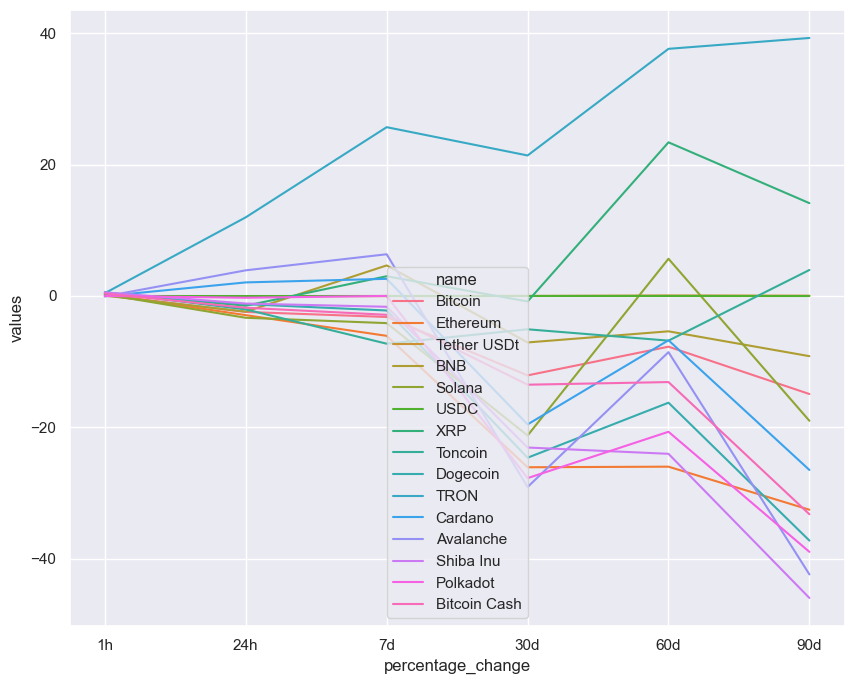

In [121]:
sns.lineplot(x='percentage_change', y='values', data=df9, hue='name')
sns.set_theme(rc={'figure.figsize':(10,8)})

In [123]:
df10 = new_df[['name', 'quote.USD.price', 'Timestamp']]
df10

,name,quote.USD.price,Timestamp
0,Bitcoin,59324.214293,2024-08-21 12:31:56.543222
1,Ethereum,2583.553028,2024-08-21 12:31:56.543222
2,Tether USDt,1.000107,2024-08-21 12:31:56.543222
3,BNB,555.324431,2024-08-21 12:31:56.543222
4,Solana,141.600748,2024-08-21 12:31:56.543222
5,USDC,0.999945,2024-08-21 12:31:56.543222
6,XRP,0.599077,2024-08-21 12:31:56.543222
7,Toncoin,6.674716,2024-08-21 12:31:56.543222
8,Dogecoin,0.104066,2024-08-21 12:31:56.543222
9,TRON,0.164145,2024-08-21 12:31:56.543222


### Bitcoin prices over the time period 

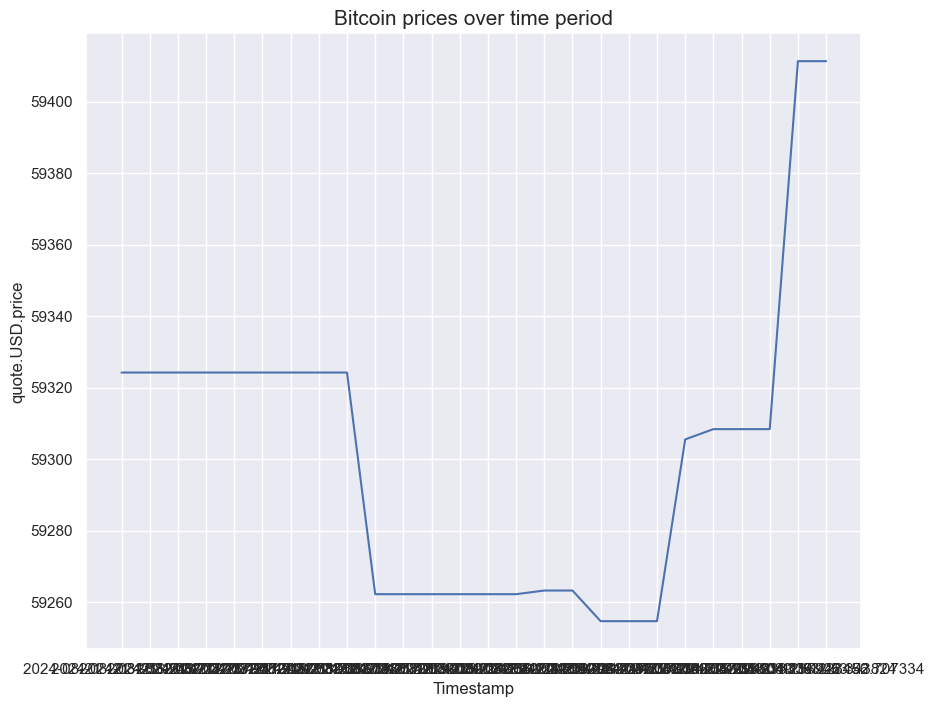

In [185]:
df11 = df10.query("name == 'Bitcoin'")
sns.lineplot(x='Timestamp', y='quote.USD.price', data=df11)
sns.set_theme(style = "darkgrid")
a = plt.title("Bitcoin prices over time period", fontsize= 15)